<a href="https://colab.research.google.com/github/Aldo05art/UTS-DataMining/blob/main/2318046_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()  # jalankan, file kamuu disini yaa
# uploaded adalah dict; ambil nama file pertama
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

Saving covid_19_indonesia_time_series_all.csv to covid_19_indonesia_time_series_all (1).csv


In [ ]:
df_raw = pd.read_csv(file_name, low_memory=False)
print("Loaded:", file_name)
print("Shape raw:", df_raw.shape)
display(df_raw.head())

Loaded: covid_19_indonesia_time_series_all (1).csv
Shape raw: (31822, 38)


,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [ ]:
df = df_raw.copy()
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
print("Columns normalized:")
print(df.columns.tolist())

Columns normalized:
['date', 'location_iso_code', 'location', 'new_cases', 'new_deaths', 'new_recovered', 'new_active_cases', 'total_cases', 'total_deaths', 'total_recovered', 'total_active_cases', 'location_level', 'city_or_regency', 'province', 'country', 'continent', 'island', 'time_zone', 'special_status', 'total_regencies', 'total_cities', 'total_districts', 'total_urban_villages', 'total_rural_villages', 'area_(km2)', 'population', 'population_density', 'longitude', 'latitude', 'new_cases_per_million', 'total_cases_per_million', 'new_deaths_per_million', 'total_deaths_per_million', 'total_deaths_per_100rb', 'case_fatality_rate', 'case_recovered_rate', 'growth_factor_of_new_cases', 'growth_factor_of_new_deaths']


In [ ]:
col_map = {}
# mapping examples; adjust keys according to actual columns
if 'date' in df.columns:
    col_map['date'] = 'date'
elif 'tanggal' in df.columns:
    col_map['tanggal'] = 'date'
if 'location' in df.columns:
    col_map['location'] = 'location'
elif 'provinsi' in df.columns:
    col_map['provinsi'] = 'location'
# cumulative / new case columns variations
for name in ['new_cases', 'new_case', 'kasus_baru', 'daily_cases']:
    if name in df.columns and 'new_cases' not in col_map.values():
        col_map[name] = 'new_cases'
for name in ['total_cases', 'cum_cases', 'total_kasus']:
    if name in df.columns and 'total_cases' not in col_map.values():
        col_map[name] = 'total_cases'
for name in ['new_deaths', 'new_death', 'daily_deaths']:
    if name in df.columns and 'new_deaths' not in col_map.values():
        col_map[name] = 'new_deaths'
for name in ['total_deaths', 'cum_deaths']:
    if name in df.columns and 'total_deaths' not in col_map.values():
        col_map[name] = 'total_deaths'
for name in ['new_recovered','new_recovery']:
    if name in df.columns and 'new_recovered' not in col_map.values():
        col_map[name] = 'new_recovered'
for name in ['total_recovered','cum_recovered']:
    if name in df.columns and 'total_recovered' not in col_map.values():
        col_map[name] = 'total_recovered'
# Population
if 'population' in df.columns:
    col_map['population'] = 'population'

# Apply renaming for existing keys
rename_map = {k: v for k, v in col_map.items() if k in df.columns}
if rename_map:
    df = df.rename(columns=rename_map)
    print("Applied rename map:", rename_map)

Applied rename map: {'date': 'date', 'location': 'location', 'new_cases': 'new_cases', 'total_cases': 'total_cases', 'new_deaths': 'new_deaths', 'total_deaths': 'total_deaths', 'new_recovered': 'new_recovered', 'total_recovered': 'total_recovered', 'population': 'population'}


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=False, infer_datetime_format=True)
# If many NaT, try dayfirst True
if df['date'].isna().mean() > 0.2:
    df['date'] = pd.to_datetime(df_raw.get('date', df_raw.iloc[:,0]), errors='coerce', dayfirst=True, infer_datetime_format=True)

print("Dates parsed. NaT count:", df['date'].isna().sum())
# Drop rows without date or location — flag first
df = df[~df['date'].isna()].copy()
df = df.dropna(subset=['location'])  # if location missing, drop (or you can flag instead)
df['location'] = df['location'].astype(str).str.strip()

# Sort by location & date
df = df.sort_values(['location', 'date']).reset_index(drop=True)

Dates parsed. NaT count: 0


/tmp/ipython-input-3087702119.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=False, infer_datetime_format=True)


In [ ]:
def to_numeric_col(col):
    # Remove commas, spaces, and coercion
    return pd.to_numeric(df[col].astype(str).str.replace(r'[,\s]', '', regex=True).replace({'':np.nan,'-':np.nan}), errors='coerce')

num_cols_candidates = ['new_cases','total_cases','new_deaths','total_deaths','new_recovered','total_recovered','population']
for c in num_cols_candidates:
    if c in df.columns:
        df[c] = to_numeric_col(c)

# Show missing and types
print("\nAfter numeric coercion:")
display(df.info())
print(df[num_cols_candidates].isnull().sum())


After numeric coercion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         31822 non-null  datetime64[ns]
 1   location_iso_code            31822 non-null  object        
 2   location                     31822 non-null  object        
 3   new_cases                    31822 non-null  int64         
 4   new_deaths                   31822 non-null  int64         
 5   new_recovered                31822 non-null  int64         
 6   new_active_cases             31822 non-null  int64         
 7   total_cases                  31822 non-null  int64         
 8   total_deaths                 31822 non-null  int64         
 9   total_recovered              31822 non-null  int64         
 10  total_active_cases           31822 non-null  int64         
 11  location_level  

None

new_cases          0
total_cases        0
new_deaths         0
total_deaths       0
new_recovered      0
total_recovered    0
population         0
dtype: int64


In [ ]:
if 'new_cases' in df.columns:
    neg_count = (df['new_cases'] < 0).sum()
    if neg_count > 0:
        print("Found negative new_cases:", neg_count)
        df.loc[df['new_cases'] < 0, 'new_cases'] = np.nan

In [ ]:
dup_full = df.duplicated().sum()
dup_loc_date = df.duplicated(subset=['location','date']).sum()
print(f"Exact duplicate rows: {dup_full}; duplicate (location,date): {dup_loc_date}")

if dup_full > 0:
    df = df.drop_duplicates().reset_index(drop=True)

# When duplicate (location,date) exist, keep the row with highest info (e.g. max total_cases) or last reported
if dup_loc_date > 0:
    # strategy: group and keep row with max total_cases if exists, else last
    def resolve_group(g):
        if 'total_cases' in g.columns and g['total_cases'].notna().any():
            return g.loc[g['total_cases'].idxmax()]
        else:
            return g.iloc[-1]
    df = df.groupby(['location','date'], as_index=False).apply(lambda g: resolve_group(g)).reset_index(drop=True)


Exact duplicate rows: 0; duplicate (location,date): 0


In [ ]:
def ensure_consistency(group):
    group = group.sort_values('date').copy()
    # If total_cases exists:
    if 'total_cases' in group.columns and group['total_cases'].notna().any():
        # fill forward small gaps in total if necessary? better to not fill automatically
        # Enforce non-decreasing: if decreases, take cumulative max
        group['total_cases_fixed'] = group['total_cases'].cummax()
        # compute new_cases_from_total
        group['new_cases_from_total'] = group['total_cases_fixed'].diff().fillna(group['total_cases_fixed'])
        # if new_cases is missing or negative, use new_cases_from_total
        if 'new_cases' in group.columns:
            # flag where we replace
            group['new_cases_was_missing_or_negative'] = group['new_cases'].isna() | (group['new_cases'] < 0)
            group.loc[group['new_cases_was_missing_or_negative'], 'new_cases'] = group.loc[group['new_cases_was_missing_or_negative'], 'new_cases_from_total']
        else:
            group['new_cases'] = group['new_cases_from_total']
        # If total_cases has NaN but new_cases present, rebuild cumulative
    elif 'new_cases' in group.columns and group['new_cases'].notna().any():
        # reconstruct total
        group['total_cases_fixed'] = group['new_cases'].cumsum()
    else:
        group['total_cases_fixed'] = np.nan
        group['new_cases'] = group.get('new_cases', np.nan)
    return group

# Apply per location
if 'location' in df.columns:
    df = df.groupby('location', group_keys=False).apply(ensure_consistency).reset_index(drop=True)
else:
    df = ensure_consistency(df)

# Replace total_cases with fixed if exists
if 'total_cases_fixed' in df.columns:
    df['total_cases'] = df['total_cases_fixed']
    df = df.drop(columns=['total_cases_fixed','new_cases_from_total'], errors='ignore')

/tmp/ipython-input-4222069874.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('location', group_keys=False).apply(ensure_consistency).reset_index(drop=True)


In [ ]:
df['flag_missing_cases'] = df[['new_cases','total_cases']].isnull().all(axis=1)
df['flag_negative_new'] = df['new_cases'] < 0
# Spike detection: local z-score per location on new_cases
def flag_spikes(group, z_thresh=4.0):
    vals = group['new_cases'].fillna(0)
    mean = vals.mean()
    std = vals.std(ddof=0) if vals.std(ddof=0)>0 else 0.0
    if std == 0:
        return pd.Series([False]*len(vals), index=group.index)
    z = (vals - mean) / std
    return (z.abs() > z_thresh)
if 'location' in df.columns:
    df['flag_spike'] = df.groupby('location', group_keys=False).apply(lambda g: flag_spikes(g)).astype(bool)
else:
    df['flag_spike'] = flag_spikes(df)


/tmp/ipython-input-1929468313.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['flag_spike'] = df.groupby('location', group_keys=False).apply(lambda g: flag_spikes(g)).astype(bool)


In [ ]:
num_fill_cols = []
for c in ['new_cases','new_deaths','new_recovered']:
    if c in df.columns:
        num_fill_cols.append(c)

# Count missing before impute
print("Missing before impute (selected):")
print(df[num_fill_cols].isnull().sum())

# Impute strategy: median per location if enough data, else global median
def impute_by_group(series):
    # accepts a Series per group
    return series.fillna(series.median())

df_imputed = df.copy()
for c in num_fill_cols:
    if 'location' in df_imputed.columns:
        # apply per-location median; fallback to global median
        df_imputed[c] = df_imputed.groupby('location')[c].transform(lambda s: s.fillna(s.median()))
        global_med = df_imputed[c].median()
        df_imputed[c] = df_imputed[c].fillna(global_med)
    else:
        df_imputed[c] = df_imputed[c].fillna(df_imputed[c].median())


print("Missing after impute (selected):")
print(df_imputed[num_fill_cols].isnull().sum())

Missing before impute (selected):
new_cases        0
new_deaths       0
new_recovered    0
dtype: int64
Missing after impute (selected):
new_cases        0
new_deaths       0
new_recovered    0
dtype: int64


In [ ]:
df_imputed['new_cases'] = df_imputed['new_cases'].clip(lower=0)
# Recompute totals from new_cases to ensure consistency if desired
if 'new_cases' in df_imputed.columns:
    df_imputed = df_imputed.sort_values(['location','date']).reset_index(drop=True)
    df_imputed['total_cases_recalc'] = df_imputed.groupby('location')['new_cases'].cumsum()
    # Compare total_cases vs recalculated total; if large mismatch flag
    if 'total_cases' in df_imputed.columns:
        df_imputed['flag_total_mismatch'] = (~df_imputed['total_cases'].isna()) & \
                                            ( (df_imputed['total_cases'] - df_imputed['total_cases_recalc']).abs() > (0.1 * df_imputed['total_cases_recalc'] + 1) )
    else:
        df_imputed['total_cases'] = df_imputed['total_cases_recalc']
else:
    df_imputed['total_cases_recalc'] = np.nan

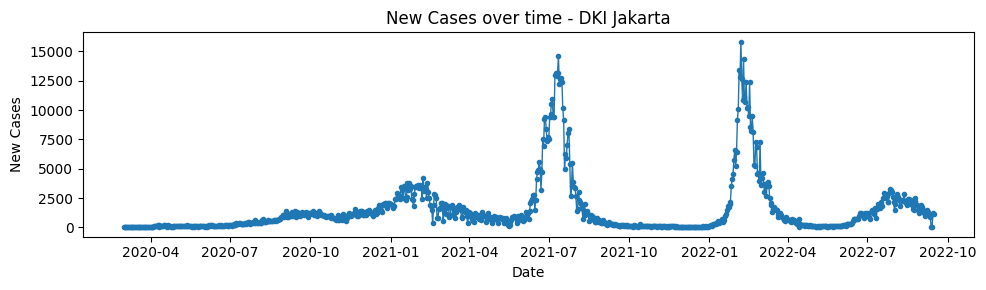

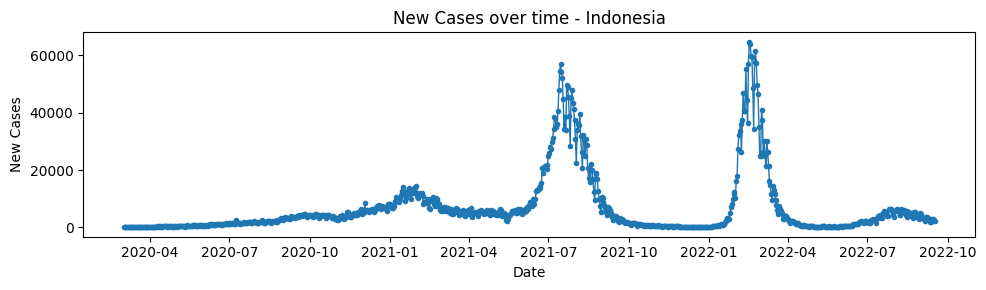

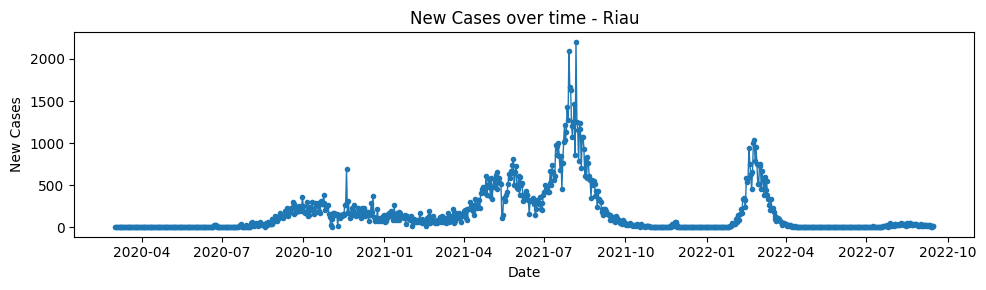

In [ ]:
sample_locations = df_imputed['location'].value_counts().index[:3].tolist()
for loc in sample_locations:
    sub = df_imputed[df_imputed['location']==loc]
    plt.figure(figsize=(10,3))
    plt.plot(sub['date'], sub['new_cases'], marker='.', linewidth=1)
    plt.title(f"New Cases over time - {loc}")
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.tight_layout()
    plt.show()

12. Simpan file bersih & unduh

In [ ]:
out_name = "covid19_indonesia_cleaned.csv"
df_out = df_imputed.copy()
# Reorder columns to put flags at end
flag_cols = [c for c in df_out.columns if c.startswith('flag_') or c.endswith('_was_missing') or c.endswith('_outlier')]
cols_order = [c for c in df_out.columns if c not in flag_cols] + flag_cols
df_out = df_out[cols_order]

df_out.to_csv(out_name, index=False)
print("Saved cleaned dataset to:", out_name)
files.download(out_name)

Saved cleaned dataset to: covid19_indonesia_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>